# Tagasiside analüüs #

Siin notebooki failis on tehtud Soovitaja tagasiside analüüs.


## Impordid ##

In [3]:
import VectorStore
import pandas as pd
import matplotlib.pyplot as plt

#initsialiseerime vektorandmebaasi
vecStore = VectorStore.VectorStore("database", 3072)

## 1. Kõikide vastanute arv ##

In [4]:
count = vecStore.get_all_count_from_feedback()
print(f"Kokku oli vastanuid: {count[0]}\n")

Kokku oli vastanuid: 87



## 2. Vastanute arv valdkonniti ##

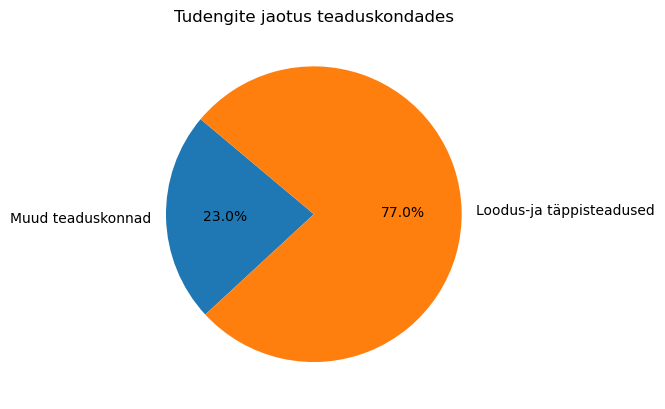

Valdkonniti oli vastanuid: [('Humanitaarteadused ja kunst', 1), ('Loodus-ja täppisteadused', 67), ('Meditsiiniteadus', 5), ('Sotsiaalteadused', 14)]



In [16]:
facCount = vecStore.count_all_faculty()
valdkonnad = ["Muud teaduskonnad", "Loodus-ja täppisteadused"]
arv = [0, 0]
for valdkond in facCount:
    if (valdkond[0] == "Loodus-ja täppisteadused"):
        arv[1] = valdkond[1]
    else:
        arv[0] += valdkond[1]
    
    

# Create pie chart
plt.pie(arv, labels=valdkonnad, autopct='%1.1f%%', startangle=140)

# Optional: Add a title
plt.title('Tudengite jaotus teaduskondades')

# Show the chart
plt.show()
print(f"Valdkonniti oli vastanuid: {facCount}\n")


## 3. Keskmine hinnang valdkondade kaupa ##

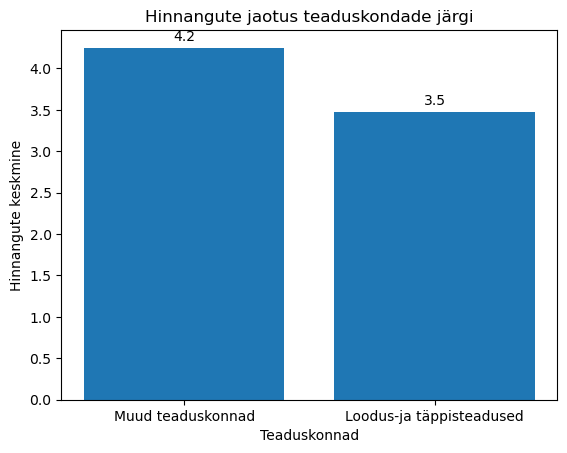

In [15]:
facCount = vecStore.get_all_ratings_by_faculty()
valdkonnad = ["Muud teaduskonnad", "Loodus-ja täppisteadused"]
arv = [0, 0]
hindedSumma = [0, 0]
for valdkond in facCount:
    if (valdkond[0] == "Loodus-ja täppisteadused"):
        arv[1] = valdkond[2]
        hindedSumma[1] = valdkond[1]
    else:
        arv[0] += valdkond[2]
        hindedSumma[0] += valdkond[1]

hindedKeskmine = [0, 0]

for i in range(len(hindedSumma)):
    hindedKeskmine[i] = hindedSumma[i] / arv[i]

#Joonis keskmiste jaoks
bars = plt.bar(valdkonnad, hindedKeskmine)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.1f}',
             ha='center', va='bottom')

plt.xlabel('Teaduskonnad')
plt.ylabel('Hinnangute keskmine')
plt.title('Hinnangute jaotus teaduskondade järgi')

plt.show()

## 4. Keskmine soovitaja meeldivus ja hinnangute jaotus ##

Kõik hinnangud loendatult: [(1, 12), (2, 7), (3, 12), (4, 24), (5, 32)]


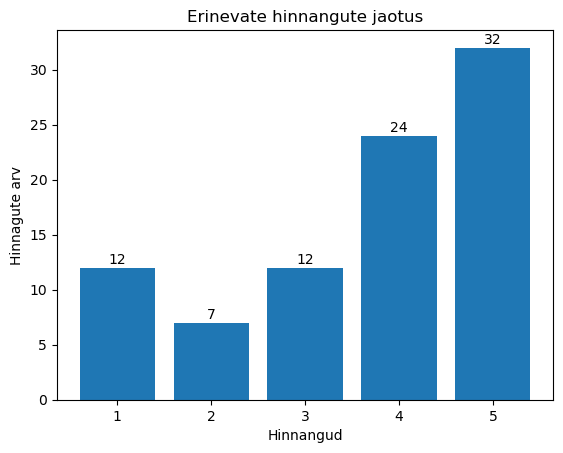

Kõikide hinnangute keskmine: 3.66



In [6]:
ratings = vecStore.get_all_ratings()
ratingCount = vecStore.count_all_ratings()
print(f"Kõik hinnangud loendatult: {ratingCount}")
ratingData = []
ratingNumbers = []
for rating in ratingCount:
    ratingData.append(rating[0])
    ratingNumbers.append(rating[1])

#Joonise loomine
barsFirst = plt.bar(ratingData, ratingNumbers)

for bar in barsFirst:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{int(height)}',
             ha='center', va='bottom')

plt.xlabel('Hinnangud')
plt.ylabel('Hinnagute arv')
plt.title('Erinevate hinnangute jaotus')

plt.show()


#Keskmise hinnangu leidmine
average = 0
for rating in ratings:
    average += rating[0]
average = round(average / 87.0, 2)
print(f"Kõikide hinnangute keskmine: {average}\n")

## 5. Suhe tagastatavate vektorite ja ainete arvu ning hinnangu vahel ##

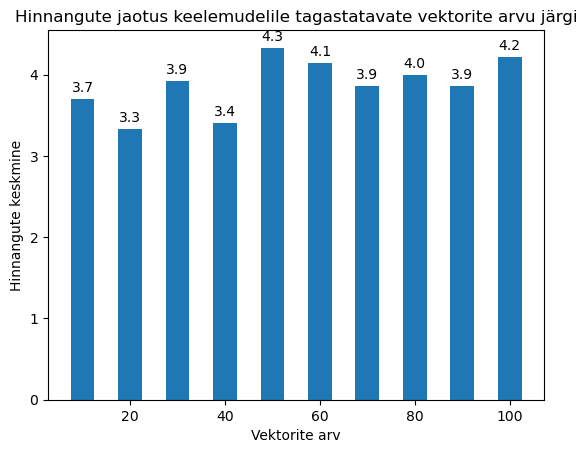

In [7]:
retVectors = vecStore.count_all_occurances_vector_number()
vectorCounts = []
averages = []
counts = []
for vectors in retVectors:
    vectorCounts.append(vectors[0])
    averages.append(round(vectors[1]/vectors[2], 2))
    counts.append(vectors[2])

#Joonis keskmiste jaoks
bars = plt.bar(vectorCounts, averages, width=5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.1f}',
             ha='center', va='bottom')

plt.xlabel('Vektorite arv')
plt.ylabel('Hinnangute keskmine')
plt.title('Hinnangute jaotus keelemudelile tagastatavate vektorite arvu järgi')

plt.show()

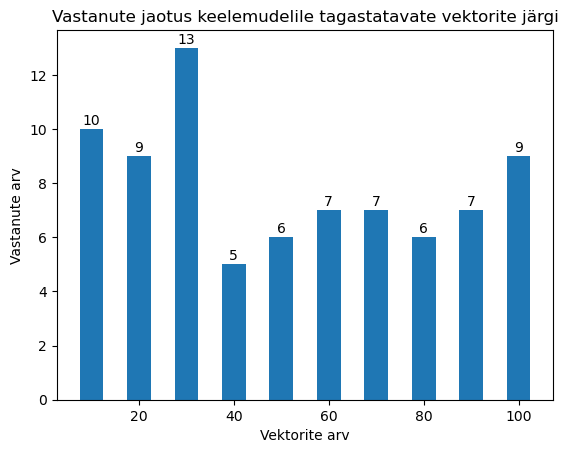

In [8]:
#Joonis vastanute arvu jaoks
bars2 = plt.bar(vectorCounts, counts, width = 5)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{int(height)}',
             ha='center', va='bottom')

plt.xlabel('Vektorite arv')
plt.ylabel('Vastanute arv')
plt.title('Vastanute jaotus keelemudelile tagastatavate vektorite järgi')

plt.show()


In [9]:
retVectors = vecStore.count_all_occurances_returned_course_number()
for x in retVectors:
    print(f"Ainete arvu {x[0]} juures oli keskmine hinnang {round(x[1]/x[2], 2)} ja kokku oli vastanuid {x[2]}")
print(retVectors)

Ainete arvu 5 juures oli keskmine hinnang 3.9 ja kokku oli vastanuid 41
Ainete arvu 10 juures oli keskmine hinnang 3.84 ja kokku oli vastanuid 38
[(5, 160, 41), (10, 146, 38)]


## 6. Suhe päringu pikkuse ning tagasiside vahel ##

### Nende vahel on liiga madal korrelatsioon, et midagi järeldada #

In [11]:
from scipy.stats import pearsonr
prompts = vecStore.get_prompt_and_rating()
promptLengths = []
ratings = []

for l in prompts:
    promptLengths.append(len(l[0]))
    ratings.append(l[1])
    
corr, p_value = pearsonr(promptLengths, ratings)

print(f"Correlation {corr}")
print(f"P value {p_value}")

"""


#print(prompts)

plt.scatter(promptLengths, ratings)
plt.xlabel('Prompt Length')
plt.ylabel('Rating')
plt.title('Prompt Length vs. Rating')
plt.show()
"""

Correlation 0.06825031510721657
P value 0.5500731489664861


"\n\n\n#print(prompts)\n\nplt.scatter(promptLengths, ratings)\nplt.xlabel('Prompt Length')\nplt.ylabel('Rating')\nplt.title('Prompt Length vs. Rating')\nplt.show()\n"

  Using cached spicy-0.16.0-py2.py3-none-any.whl.metadata (310 bytes)
Using cached spicy-0.16.0-py2.py3-none-any.whl (1.7 kB)
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/41.0 MB 2.8 MB/s eta 0:00:15
   - -------------------------------------- 1.3/41.0 MB 2.7 MB/s eta 0:00:15
   -- ------------------------------------- 2.1/41.0 MB 2.6 MB/s eta 0:00:15
   -- ------------------------------------- 2.1/41.0 MB 2.6 MB/s eta 0:00:15
   -- ------------------------------------- 2.6/41.0 MB 2.1 MB/s eta 0:00:19
   -- ------------------------------------- 2.9/41.0 MB 2.2 MB/s eta 0:00:18
   --- ------------------------------------ 3.1/41.0 MB 1.9 MB/s eta 0:00:21
   --- ------------------------------------ 3.7/41.0 MB 1.9 MB/s eta 0:00:20
   --- ------------------------------------ 3.9/41.0 MB 1.9 MB/s eta 0:00:20
   ---- ---------------------------------